In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table, vstack
from astropy.wcs import WCS

In [5]:
SMPL = pd.read_csv("natalya/sample.dat", sep='\\s+', header=0)
D_A = FlatLambdaCDM(H0=100*0.704, Om0=0.272).angular_diameter_distance(SMPL["z"])*1000
SMPL["D_A"] = D_A.value
R_500_rescaled = SMPL["R500c(kpc)"]/D_A.value*180/np.pi
SMPL["R_500_in_degrees"] = R_500_rescaled
SMPL["R_500_in_arcmin"] = R_500_rescaled*60
SMPL["R_500_in_arcsec"] = R_500_rescaled*60*60
SMPL["smooth_fr"] = 15*2.5/SMPL["R_500_in_arcsec"]
display(SMPL)

,Name,M500c(10^14*M_sun),R500c(kpc),z,D_A,R_500_in_degrees,R_500_in_arcmin,R_500_in_arcsec,smooth_fr
0,G028.89+60.13,4.47,1133.8,0.1530,546843.804904,0.118794,7.127661,427.659663,0.087687
1,G031.93+78.71,2.72,973.8,0.0724,283174.287143,0.197033,11.821970,709.318174,0.052868
2,G033.81+77.18,4.46,1150.2,0.0622,246150.962310,0.267728,16.063705,963.822274,0.038908
3,G040.03+74.95,2.34,927.8,0.0612,242473.339280,0.219237,13.154194,789.251667,0.047513
4,G040.58+77.12,2.57,955.2,0.0748,291757.938939,0.187583,11.255000,675.300023,0.055531
5,G041.45+29.10,5.41,1203.1,0.1780,619197.717999,0.111326,6.679536,400.772130,0.093569
6,G042.81+56.61,4.22,1127.4,0.0723,282815.588663,0.228401,13.704038,822.242309,0.045607
7,G044.20+48.66,8.77,1434.7,0.0894,342952.046787,0.239690,14.381414,862.884827,0.043459
8,G046.88+56.48,5.10,1192.5,0.1145,427005.733743,0.160010,9.600604,576.036250,0.065100
9,G048.10+57.16,3.54,1062.3,0.0777,302065.833464,0.201497,12.089810,725.388572,0.051696


In [3]:
from colossus.cosmology import cosmology
from colossus.halo import profile_nfw

cosmology.setCosmology('planck18')
#p_nfw = profile_nfw.NFWProfile(M = 1E12, c = 10.0, z = 0.0, mdef = 'vir')

from colossus.halo import mass_so

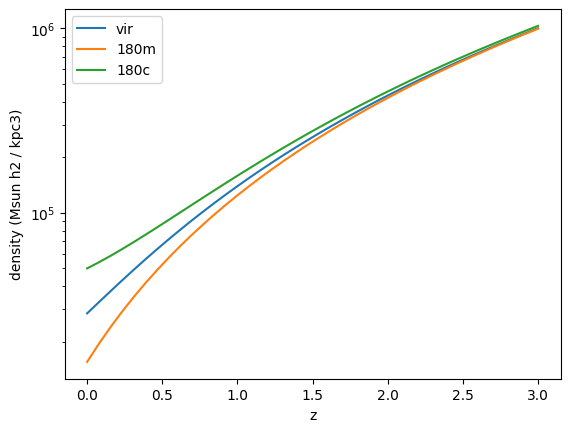

In [4]:
z = np.linspace(0.0, 3.0, 40)

plt.figure()
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('density (Msun h2 / kpc3)')
plt.plot(z, mass_so.densityThreshold(z, 'vir'), label = 'vir');
plt.plot(z, mass_so.densityThreshold(z, '180m'), label = '180m');
plt.plot(z, mass_so.densityThreshold(z, '180c'), label = '180c');
plt.legend();

In [5]:
from colossus.halo import mass_defs
from colossus.halo import mass_adv

In [6]:
M200c = 1E14
c200 = 4
M500c, R500c, c500c = mass_defs.changeMassDefinition(M200c, c200, 0.0, '200c', '500c', profile='nfw')

print(M500c/M200c)

0.6919160075199818


In [7]:
M200c = 10E14
M500c, R500c, c500c = mass_adv.changeMassDefinitionCModel(M200c, 0.0, '200c', '500c', profile='nfw', c_model='diemer19')
print(M500c/M200c)

0.681927501778529
